# OrionKL test with method 1

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 20})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-3rd_mnras_submission/figures/"

/Users/m0v00aw/miniconda3/lib/python3.6/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


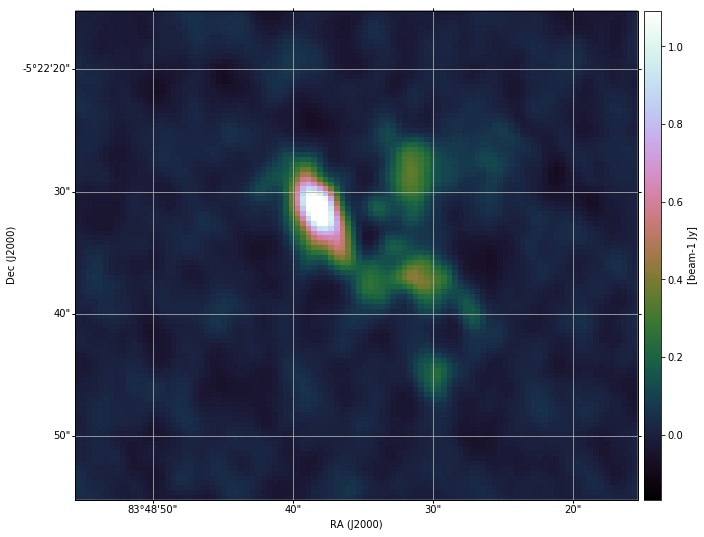

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu,spec = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

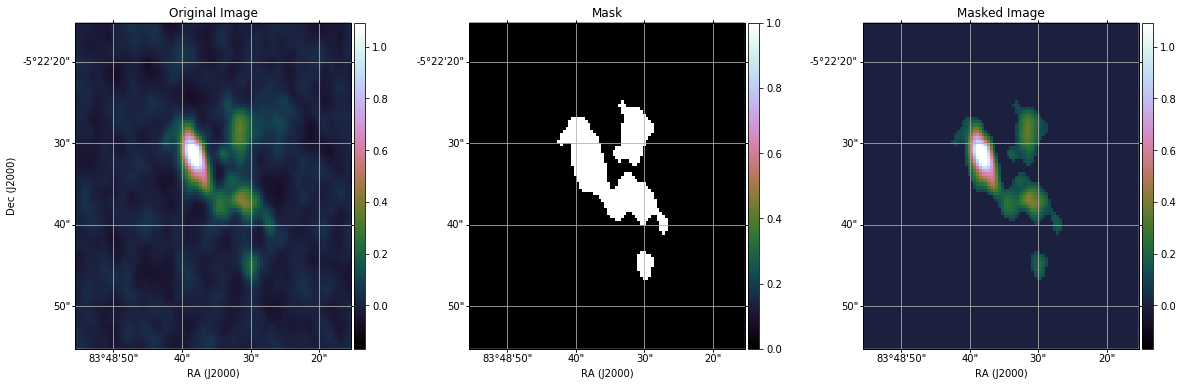

back_level:  0.10237737624469602


In [3]:
preprocessing(data, wcs)

[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 26.702269692923895%
[INFO] Number of ICEs: 3
Isolated Cloud Entity A: 47 pixels of significant emission.
Isolated Cloud Entity B: 508 pixels of significant emission.
Isolated Cloud Entity C: 194 pixels of significant emission.


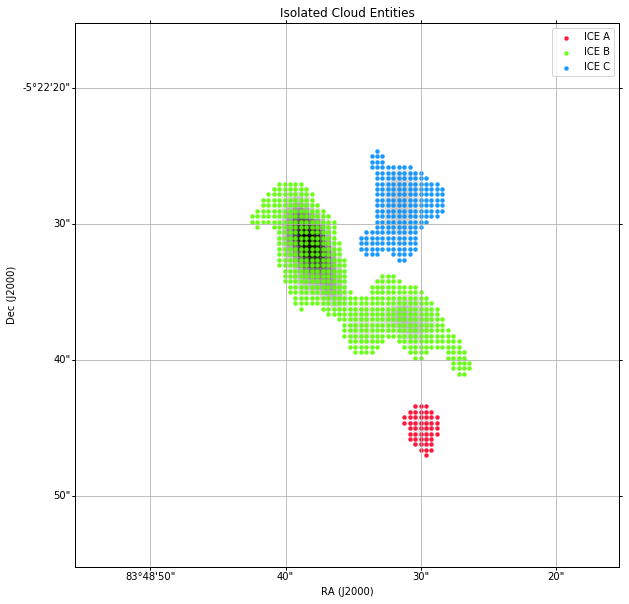

####################################################################################################


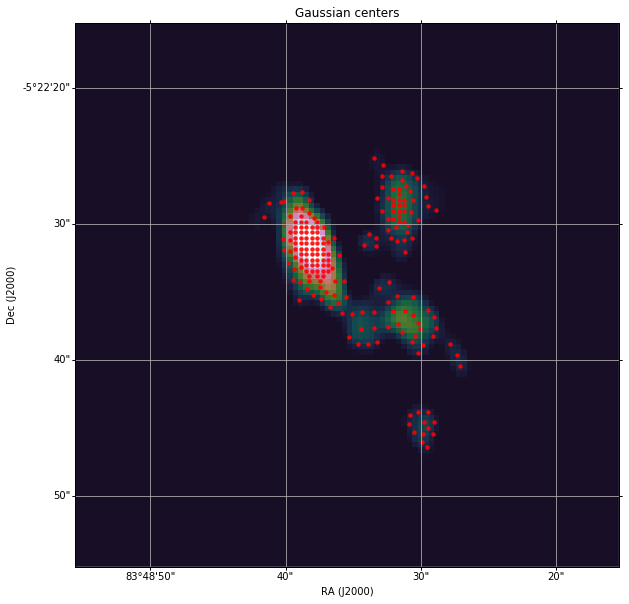

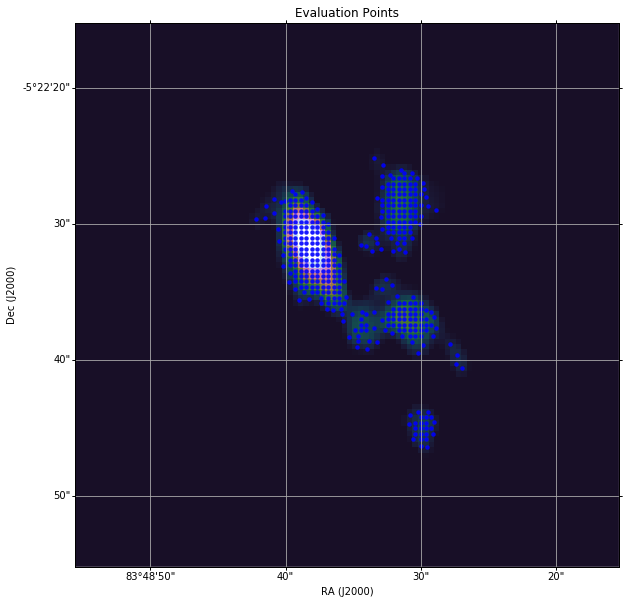

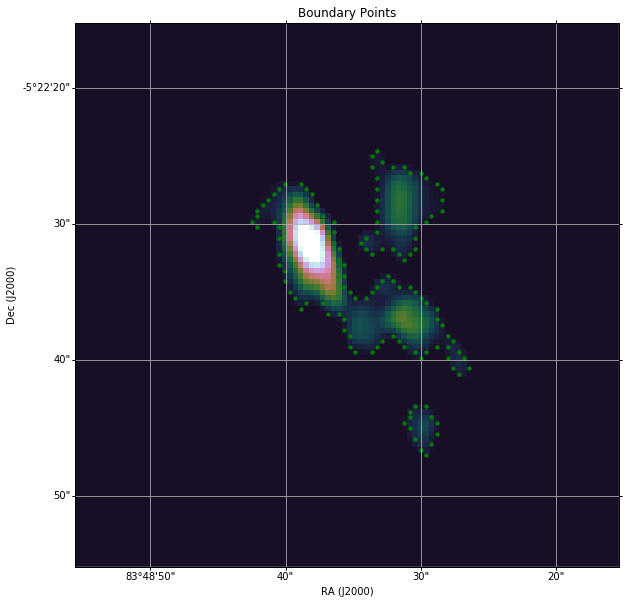

 
*** Profile printout saved to text file 'gmr_v1.prof'. 


In [4]:
%%prun -s tottime -q -l 30 -T gmr_v1.prof
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_gaussians=200)

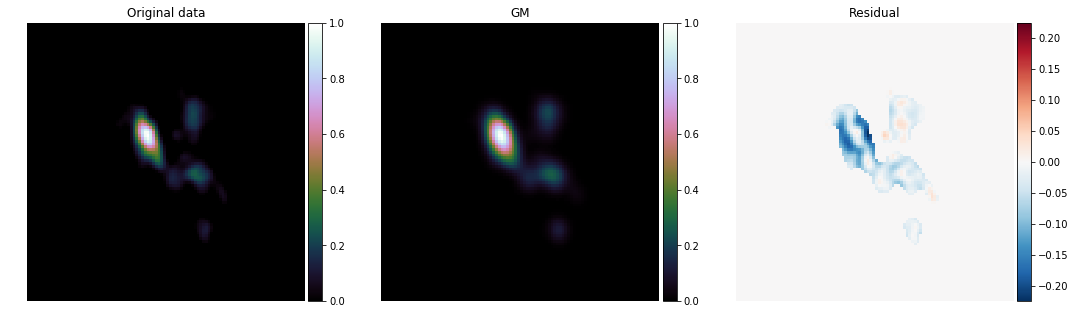

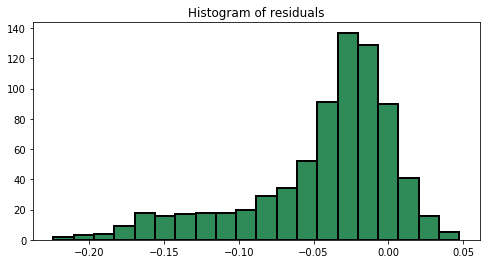

RESIDUAL STATS
RMS of residual: 0.018053141240051872
Inf norm of residual: 0.22378834237271072
Variance of residual: 0.0003152367747294851
Normalized flux addition: 0.3034734251098991
Normalized flux lost: 0.01137300356327643


In [5]:
hdmc.get_residual_stats();

In [6]:
print(open('gmr_v1.prof', 'r').read())

         2973228 function calls (2927619 primitive calls) in 4.487 seconds

   Ordered by: internal time
   List reduced from 3710 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      741    1.539    0.002    1.539    0.002 {method 'acquire' of '_thread.lock' objects}
     2293    0.283    0.000    0.284    0.000 ffi.py:105(__call__)
       13    0.244    0.019    1.967    0.151 utils.py:185(compute_neighbors)
        8    0.191    0.024    0.191    0.024 {built-in method matplotlib._png.write_png}
    16950    0.142    0.000    0.143    0.000 {built-in method numpy.core.multiarray.array}
  1804232    0.122    0.000    0.122    0.000 {method 'append' of 'list' objects}
    41333    0.099    0.000    0.099    0.000 {method 'sort' of 'list' objects}
      496    0.064    0.000    0.064    0.000 {method 's2p' of 'astropy.wcs.Wcsprm' objects}
      467    0.062    0.000    0.062    0.000 gmr.py:263(update_structs)
      480    0.059  

***
***

In [8]:
%%prun -s tottime -q -l 30 -T hdmc_m1.prof
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01279385255643084
Inf norm of residual: 0.03983723707984057
Variance of residual: 0.00013302235054228083
Normalized flux addition: 0.14435414184643008
Normalized flux lost: 0.03947889906647358


---------------------------------------------
Building GM for Isolated Cloud Entity B
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.016551645003617846
Inf norm of residual: 0.06243864095564883
Variance of residual: 0.0002499887230545892
Normalized flux addition: 0.04591790546674342
Normalized flux lost: 0.019652302933292544


---------------------------------------------
Building GM for Isolated Cloud Entity C
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.009294782546205546
Inf norm of residual: 0.03419250481852022
Variance of residual: 7.859759279814817e-05
Normal

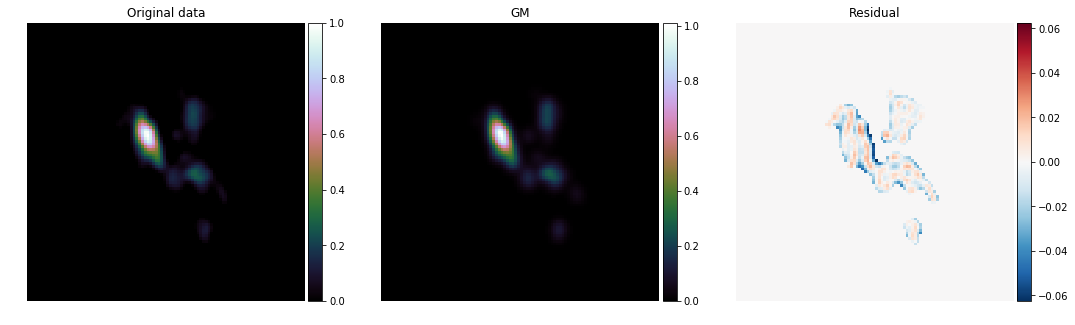

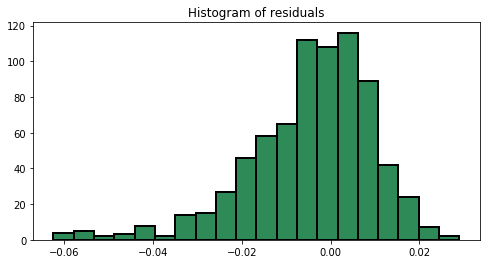

RESIDUAL STATS
RMS of residual: 0.004078768777002001
Inf norm of residual: 0.06244014010175236
Variance of residual: 1.6525059032796618e-05
Normalized flux addition: 0.05093203307363486
Normalized flux lost: 0.021112326403100002


In [9]:
hdmc.get_residual_stats();

In [10]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 33.97973012924194


In [11]:
w,sig = hdmc.get_params()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.23642773663969247
sig variation:  0.045319216298790044


#### Profiling results

In [12]:
print(open('hdmc_m1.prof', 'r').read())

         463370 function calls in 33.980 seconds

   Ordered by: internal time
   List reduced from 109 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   154035   26.918    0.000   26.918    0.000 {fgm_eval.gm_eval2d_2}
        3    4.142    1.381   33.950   11.317 {built-in method scipy.optimize._minpack._lmdif}
    77016    1.550    0.000   29.811    0.000 hdmclouds_v1.py:919(F)
    77022    1.023    0.000    1.023    0.000 utils.py:149(sig_mapping)
    77021    0.303    0.000    0.303    0.000 {built-in method numpy.core.multiarray.concatenate}
    77034    0.018    0.000    0.018    0.000 {built-in method builtins.len}
        2    0.011    0.005    0.011    0.005 {built-in method numpy.core.multiarray.dot}
        1    0.009    0.009    0.009    0.009 basic.py:907(inv)
        1    0.002    0.002    0.002    0.002 {method 'outer' of 'numpy.ufunc' objects}
        3    0.001    0.000    0.003    0.001 hdmclouds_v1.py:848(get_r

***

### Building the hierarchical tree

In [14]:
hdmc.build_hierarchical_tree()

Building the hierarchical tree for Isolated Cloud Entity A
DONE

Building the hierarchical tree for Isolated Cloud Entity B
DONE

Building the hierarchical tree for Isolated Cloud Entity C
DONE



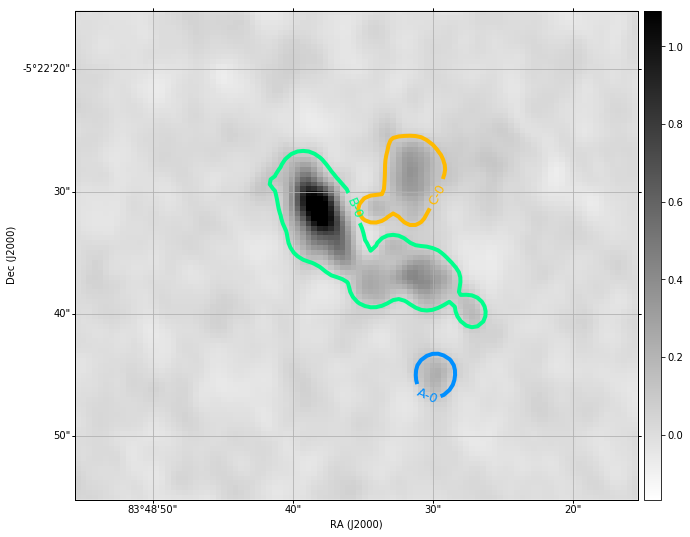

In [15]:
hdmc.visualize()

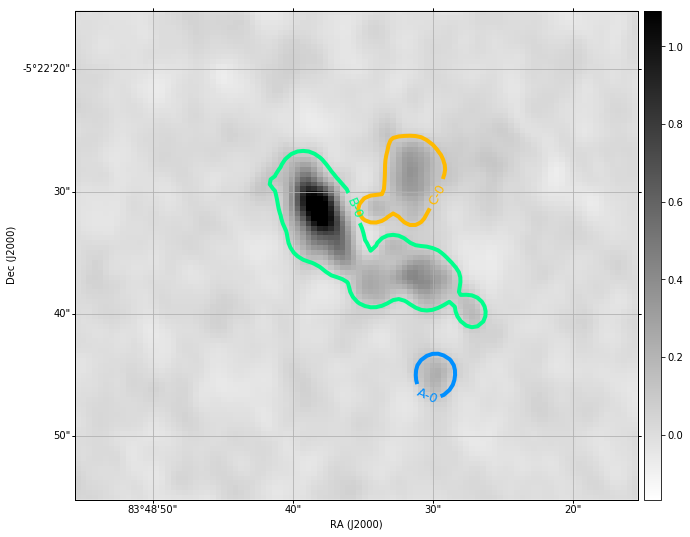

In [16]:
gp.ce_plot(hdmc, wcs=hdmc.wcs)

In [17]:
hdmc.compute_stats()

,Flux [Jy/Beam],Centroid Position (X-Y),Centroid Position (RA-Dec)
A-0,2.154937,"(0.6389988130366551, 0.2559543689789632)","(83deg48m29.8663s, -5deg22m44.9618s)"
B-0,99.399943,"(0.45727383042592273, 0.5660855541609365)","(83deg48m37.1675s, -5deg22m32.5566s)"
C-0,14.076577,"(0.5981253786361662, 0.6634260522236857)","(83deg48m31.5085s, -5deg22m28.663s)"


***

## Comparison with `clumpfind` and `fellwalker`

In [124]:
from pycupid import clumpfind,fellwalker


def compute_caa_stats(data, caa, wcs):
    stats = {}

    for i in range(caa.min()+1, caa.max()+1):
        values = data[caa==i]
        xpos,ypos = np.where(caa==i)

        flux = np.sum(values)
        x_centroid = np.sum(xpos*values)/np.sum(values)
        y_centroid = np.sum(ypos*values)/np.sum(values)

        wx_centroid,wy_centroid = wcs.wcs_pix2world(x_centroid,y_centroid,0)

        stats["CE {0}".format(i)] = (flux, (x_centroid,y_centroid), (wx_centroid,wy_centroid))


    stats = pd.DataFrame.from_dict(stats, orient="index", columns=["Flux [Jy/Beam]", "Centroid Position [pix]", "Centroid Position (ra-dec) [deg]"])   

    display(stats)
    return stats


def caa_show(data, caa, save_path=None, wcs=None):
    bd_map = boundary_map_caa(caa).T
    colors = plt.cm.rainbow(np.linspace(0., 1., caa.max()))
    
    cmap = plt.cm.gray_r
    norm = plt.Normalize(data.min(), data.max())
    rgba = cmap(norm(data))
    
    m,n = data.shape
    for i in range(m):
        for j in range(n):
            if bd_map[i,j]==0: continue
            rgba[i,j,:] = colors[bd_map[i,j]-1]

    patches = []
    for i,color in enumerate(colors):
        colors[bd_map[i,j]-1]
        patches.append(mpatches.Patch(color=color, label='CE {0}'.format(i+1)))

    fig = plt.figure(figsize=(8,8))
    if wcs is not None: fig.gca(projection=wcs)
    im = plt.imshow(rgba)
    plt.grid()
    if wcs is not None:
        plt.xlabel(umap[wcs.axis_type_names[0]])
        plt.ylabel(umap[wcs.axis_type_names[1]])
    else:
        plt.tick_params(labelbottom=False, labelleft=False)
    ax = plt.gca()
    ax.invert_yaxis()
    if save_path is not None:
        plt.savefig(save_path, format='eps', dpi=150, bbox_inches='tight')
    #if wcs is not None:
        #cbar = plt.colorbar(im, ax=ax, pad=0.01, aspect=30)
    ax.set_aspect('auto')
    plt.legend(handles=patches)
    plt.show()

***
### `clumpfind`

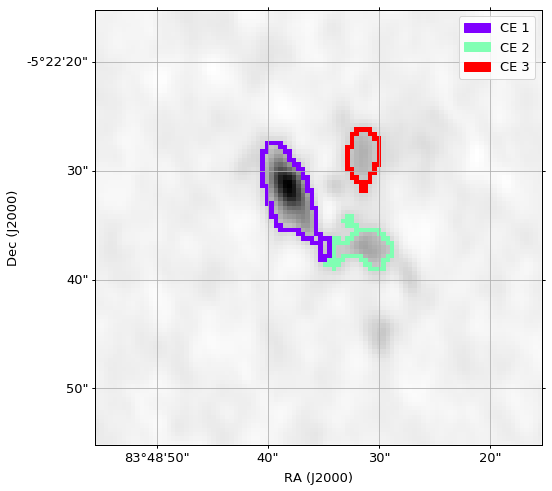

In [125]:
#out_cf = clumpfind(data, 0.5*base_level)
out_cf = clumpfind(data, 0.078)
out_cf[out_cf==out_cf.min()] = 0.

caa_show(data, out_cf, wcs=wcs)

In [126]:
compute_caa_stats(data, out_cf, wcs);

,Flux [Jy/Beam],Centroid Position [pix],Centroid Position (ra-dec) [deg]
CE 1,47.263725,"(45.102418348646694, 55.110800500659856)","(83.81033824649124, -5.375821021923468)"
CE 2,63.512123,"(58.75269896603537, 43.558794516594915)","(83.80881484605455, -5.377104577610403)"
CE 3,5.147349,"(60.02130581784532, 62.89499710792854)","(83.80867327066305, -5.374956110414155)"


***
### `Fellwalker`

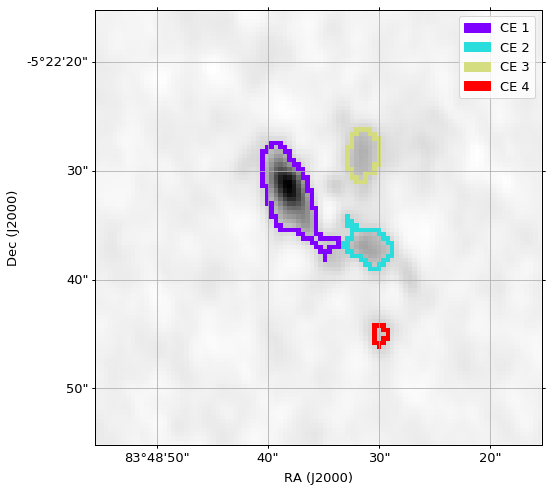

In [121]:
#out_fw = fellwalker(data, 0.5*base_level)
out_fw = fellwalker(data, 0.078)
out_fw[out_fw==out_fw.min()] = 0.

caa_show(data, out_fw, wcs=wcs)

In [122]:
compute_caa_stats(data, out_fw, wcs);

,Flux [Jy/Beam],Centroid Position [pix],Centroid Position (ra-dec) [deg]
CE 1,50.195412,"(45.665768954545506, 54.56304219068273)","(83.81027537549518, -5.375881884010656)"
CE 2,49.184555,"(60.03908211413193, 43.62341974234582)","(83.80867128285561, -5.3770973967846585)"
CE 3,4.008535,"(59.995116623768396, 63.916111878214366)","(83.80867619363268, -5.374842653222719)"
CE 4,-0.134510,"(64.38228471820102, 23.446268155351156)","(83.80818656590594, -5.379339301442377)"


***